In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from numpy.random import randn
from pandas import Series, DataFrame
from pylab import rcParams

In [103]:
%matplotlib inline
rcParams['figure.figsize'] = 4, 4

In [104]:
df = pd.read_csv('student_movie_ratings.csv')

df.head()

,etl_run_guid,survey_date,content_type,respondent_id,movie_id,movie_name,networks,gender_name,age_group_bracket,ethnicity_name,education_level,income_bracket,household_size,rating,is_favorite
0,897cdf62-18ac-49d5-8562-0c64cef6e837,1/31/2020,Movie,745007,9300,Man on a Ledge,NaN,Male,35 to 44,White or Caucasian,Higher education,"$150,000 - $249,999",4,5,0
1,897cdf62-18ac-49d5-8562-0c64cef6e837,1/31/2020,Movie,745007,9171,Seeds of Yesterday,NaN,Male,35 to 44,White or Caucasian,Higher education,"$150,000 - $249,999",4,5,0
2,897cdf62-18ac-49d5-8562-0c64cef6e837,1/31/2020,Movie,745007,9642,Billy Jack,NaN,Male,35 to 44,White or Caucasian,Higher education,"$150,000 - $249,999",4,5,0
3,897cdf62-18ac-49d5-8562-0c64cef6e837,1/31/2020,Movie,745007,9200,High Flying Bird,NaN,Male,35 to 44,White or Caucasian,Higher education,"$150,000 - $249,999",4,5,0
4,897cdf62-18ac-49d5-8562-0c64cef6e837,1/31/2020,Movie,745007,9577,Annihilation,NaN,Male,35 to 44,White or Caucasian,Higher education,"$150,000 - $249,999",4,5,0


In [105]:
df_drop = df.drop(['etl_run_guid','content_type','networks'], axis=1)
df_drop.head()

,survey_date,respondent_id,movie_id,movie_name,gender_name,age_group_bracket,ethnicity_name,education_level,income_bracket,household_size,rating,is_favorite
0,1/31/2020,745007,9300,Man on a Ledge,Male,35 to 44,White or Caucasian,Higher education,"$150,000 - $249,999",4,5,0
1,1/31/2020,745007,9171,Seeds of Yesterday,Male,35 to 44,White or Caucasian,Higher education,"$150,000 - $249,999",4,5,0
2,1/31/2020,745007,9642,Billy Jack,Male,35 to 44,White or Caucasian,Higher education,"$150,000 - $249,999",4,5,0
3,1/31/2020,745007,9200,High Flying Bird,Male,35 to 44,White or Caucasian,Higher education,"$150,000 - $249,999",4,5,0
4,1/31/2020,745007,9577,Annihilation,Male,35 to 44,White or Caucasian,Higher education,"$150,000 - $249,999",4,5,0


In [106]:
df_drop.describe().round(3)

,respondent_id,movie_id,rating,is_favorite
count,256306.000,256306.000,256306.000,256306.000
mean,760879.160,10540.470,3.959,0.046
std,12544.791,1082.303,1.005,0.210
min,743006.000,8984.000,1.000,0.000
25%,750776.000,9636.000,3.000,0.000
50%,759411.000,10400.000,4.000,0.000
75%,767573.000,11368.000,5.000,0.000
max,957174.000,13532.000,5.000,1.000


In [107]:
pd.DataFrame({'count': len(df),
     'missing values': df.isnull().sum(),
              })

,count,missing values
etl_run_guid,256306,0
survey_date,256306,0
content_type,256306,0
respondent_id,256306,0
movie_id,256306,0
movie_name,256306,0
networks,256306,256306
gender_name,256306,0
age_group_bracket,256306,0
ethnicity_name,256306,0


<AxesSubplot:title={'center':'Gender distribution'}>

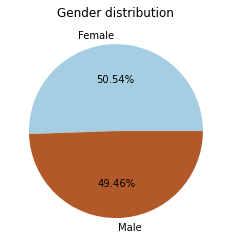

In [108]:
gender = df_drop['gender_name'].value_counts()
gender.plot(kind='pie', label='', grid=True, title='Gender distribution', autopct='%1.2f%%', colormap='Paired')

In [109]:
df_drop['gender_name'].value_counts()

Female    129540
Male      126766
Name: gender_name, dtype: int64

<AxesSubplot:title={'center':'Age Group Bracket freq distribution'}>

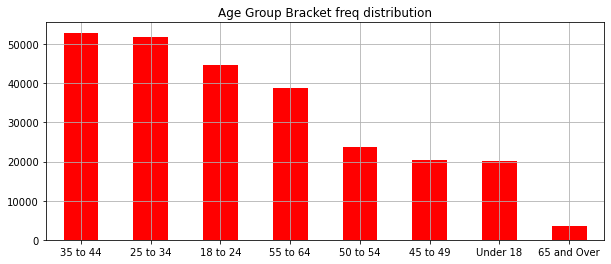

In [110]:
age = df_drop['age_group_bracket'].value_counts()
age.plot(kind='bar', color='red', rot=0, figsize=(10,4), grid=True, title='Age Group Bracket freq distribution')

In [111]:
df_drop['age_group_bracket'].value_counts()

35 to 44       52948
25 to 34       51936
18 to 24       44661
55 to 64       38939
50 to 54       23616
45 to 49       20494
Under 18       20105
65 and Over     3607
Name: age_group_bracket, dtype: int64

<AxesSubplot:title={'center':'Ethnicity'}>

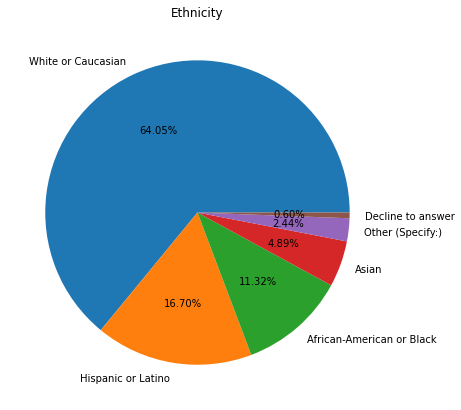

In [112]:
eth = df_drop['ethnicity_name'].value_counts()
eth.plot(kind='pie', label='', title='Ethnicity', autopct='%1.2f%%', figsize=[7,7])

In [113]:
df_drop['ethnicity_name'].value_counts()

White or Caucasian           164165
Hispanic or Latino            42803
African-American or Black     29010
Asian                         12535
Other (Specify:)               6251
Decline to answer              1542
Name: ethnicity_name, dtype: int64

<AxesSubplot:title={'center':'Education Level'}>

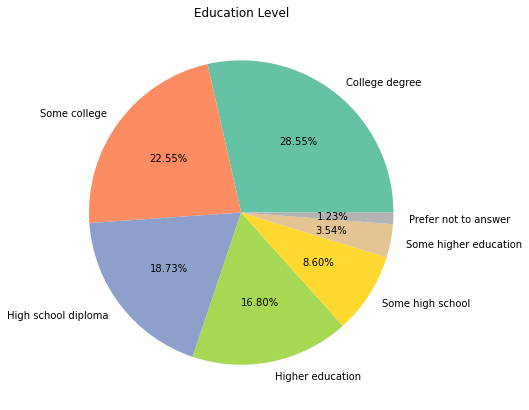

In [114]:
edu = df_drop['education_level'].value_counts()
edu.plot(kind='pie', title='Education Level', autopct='%1.2f%%', figsize=(7,7), label='', colormap='Set2')

In [115]:
df_drop['education_level'].value_counts()

College degree           73187
Some college             57798
High school diploma      47994
Higher education         43063
Some high school         22052
Some higher education     9071
Prefer not to answer      3141
Name: education_level, dtype: int64

<AxesSubplot:title={'center':'Rating freq distribution'}>

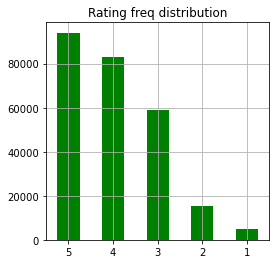

In [116]:
rate = df_drop['rating'].value_counts()
rate.plot(kind='bar', grid=True, title='Rating freq distribution', rot=0, color='green')

<AxesSubplot:title={'center':'Income bracket distribution'}>

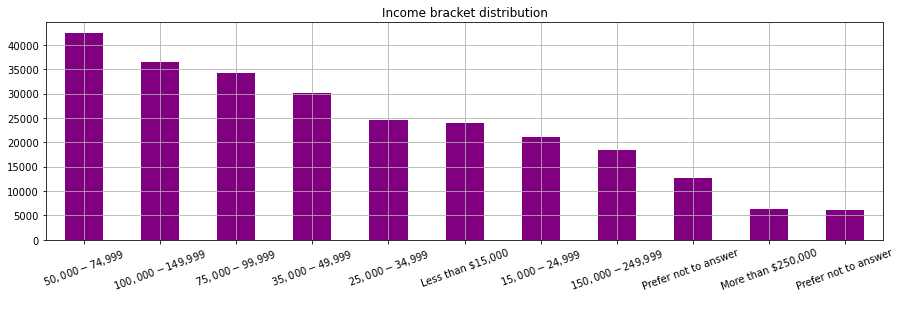

In [117]:
inc = df_drop['income_bracket'].value_counts()
inc.plot(kind='bar', figsize=(15,4), rot=20, title='Income bracket distribution', color='purple', grid=True)

<AxesSubplot:title={'center':'household size freq'}>

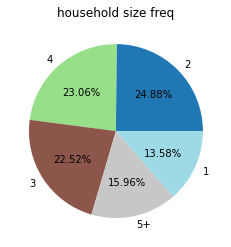

In [118]:
house = df_drop['household_size'].value_counts()
house.plot(kind='pie', label='', title='household size freq', colormap='tab20', autopct='%1.2f%%')

In [119]:
df_drop['household_size'].value_counts()

2     63771
4     59093
3     57726
5+    40908
1     34808
Name: household_size, dtype: int64

<AxesSubplot:title={'center':'Favourites Freq'}>

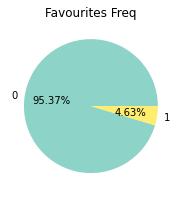

In [120]:
fav = df_drop['is_favorite'].value_counts()
fav.plot(kind='pie', label='', title='Favourites Freq', autopct='%1.2f%%', figsize=(3,4), colormap='Set3')

In [121]:
df_drop['is_favorite'].value_counts()

0    244442
1     11864
Name: is_favorite, dtype: int64

In [122]:
df_drop.dtypes

survey_date          object
respondent_id         int64
movie_id              int64
movie_name           object
gender_name          object
age_group_bracket    object
ethnicity_name       object
education_level      object
income_bracket       object
household_size       object
rating                int64
is_favorite           int64
dtype: object

### METADATA

* 8 String Variables: survey_date, movie_name, gender_name, age_group_bracket, ethnicity_name, education_level, income_bracket, household_size
    * survey_date should be datatime data type
    * every other variable is nominal/categorical
* 4 Integer Variables: respondent_id, movie_id, rating, is_favorite
    * respondent_id, is_favorite, and movie_id are nominal/categorical
    * rating is ordinal